<a href="https://colab.research.google.com/github/aneeshkarthikrh86/MachineLearningAssesment/blob/main/TimeSeriesAssesment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Time Series Model to predict the future air passenger traffic

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['#Passengers'].max()

622

In [ ]:
data['#Passengers'].min()

104

In [ ]:
data = pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [ ]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Insights from Description
- The average number of passengers is approximately 280. The maximum number of passengers recorded is 622, indicating strong growth over time. The minimum value is 104 passengers, which occurred in the early years of the dataset. The data shows a clear upward trend with seasonal fluctuations across months.

# EDA

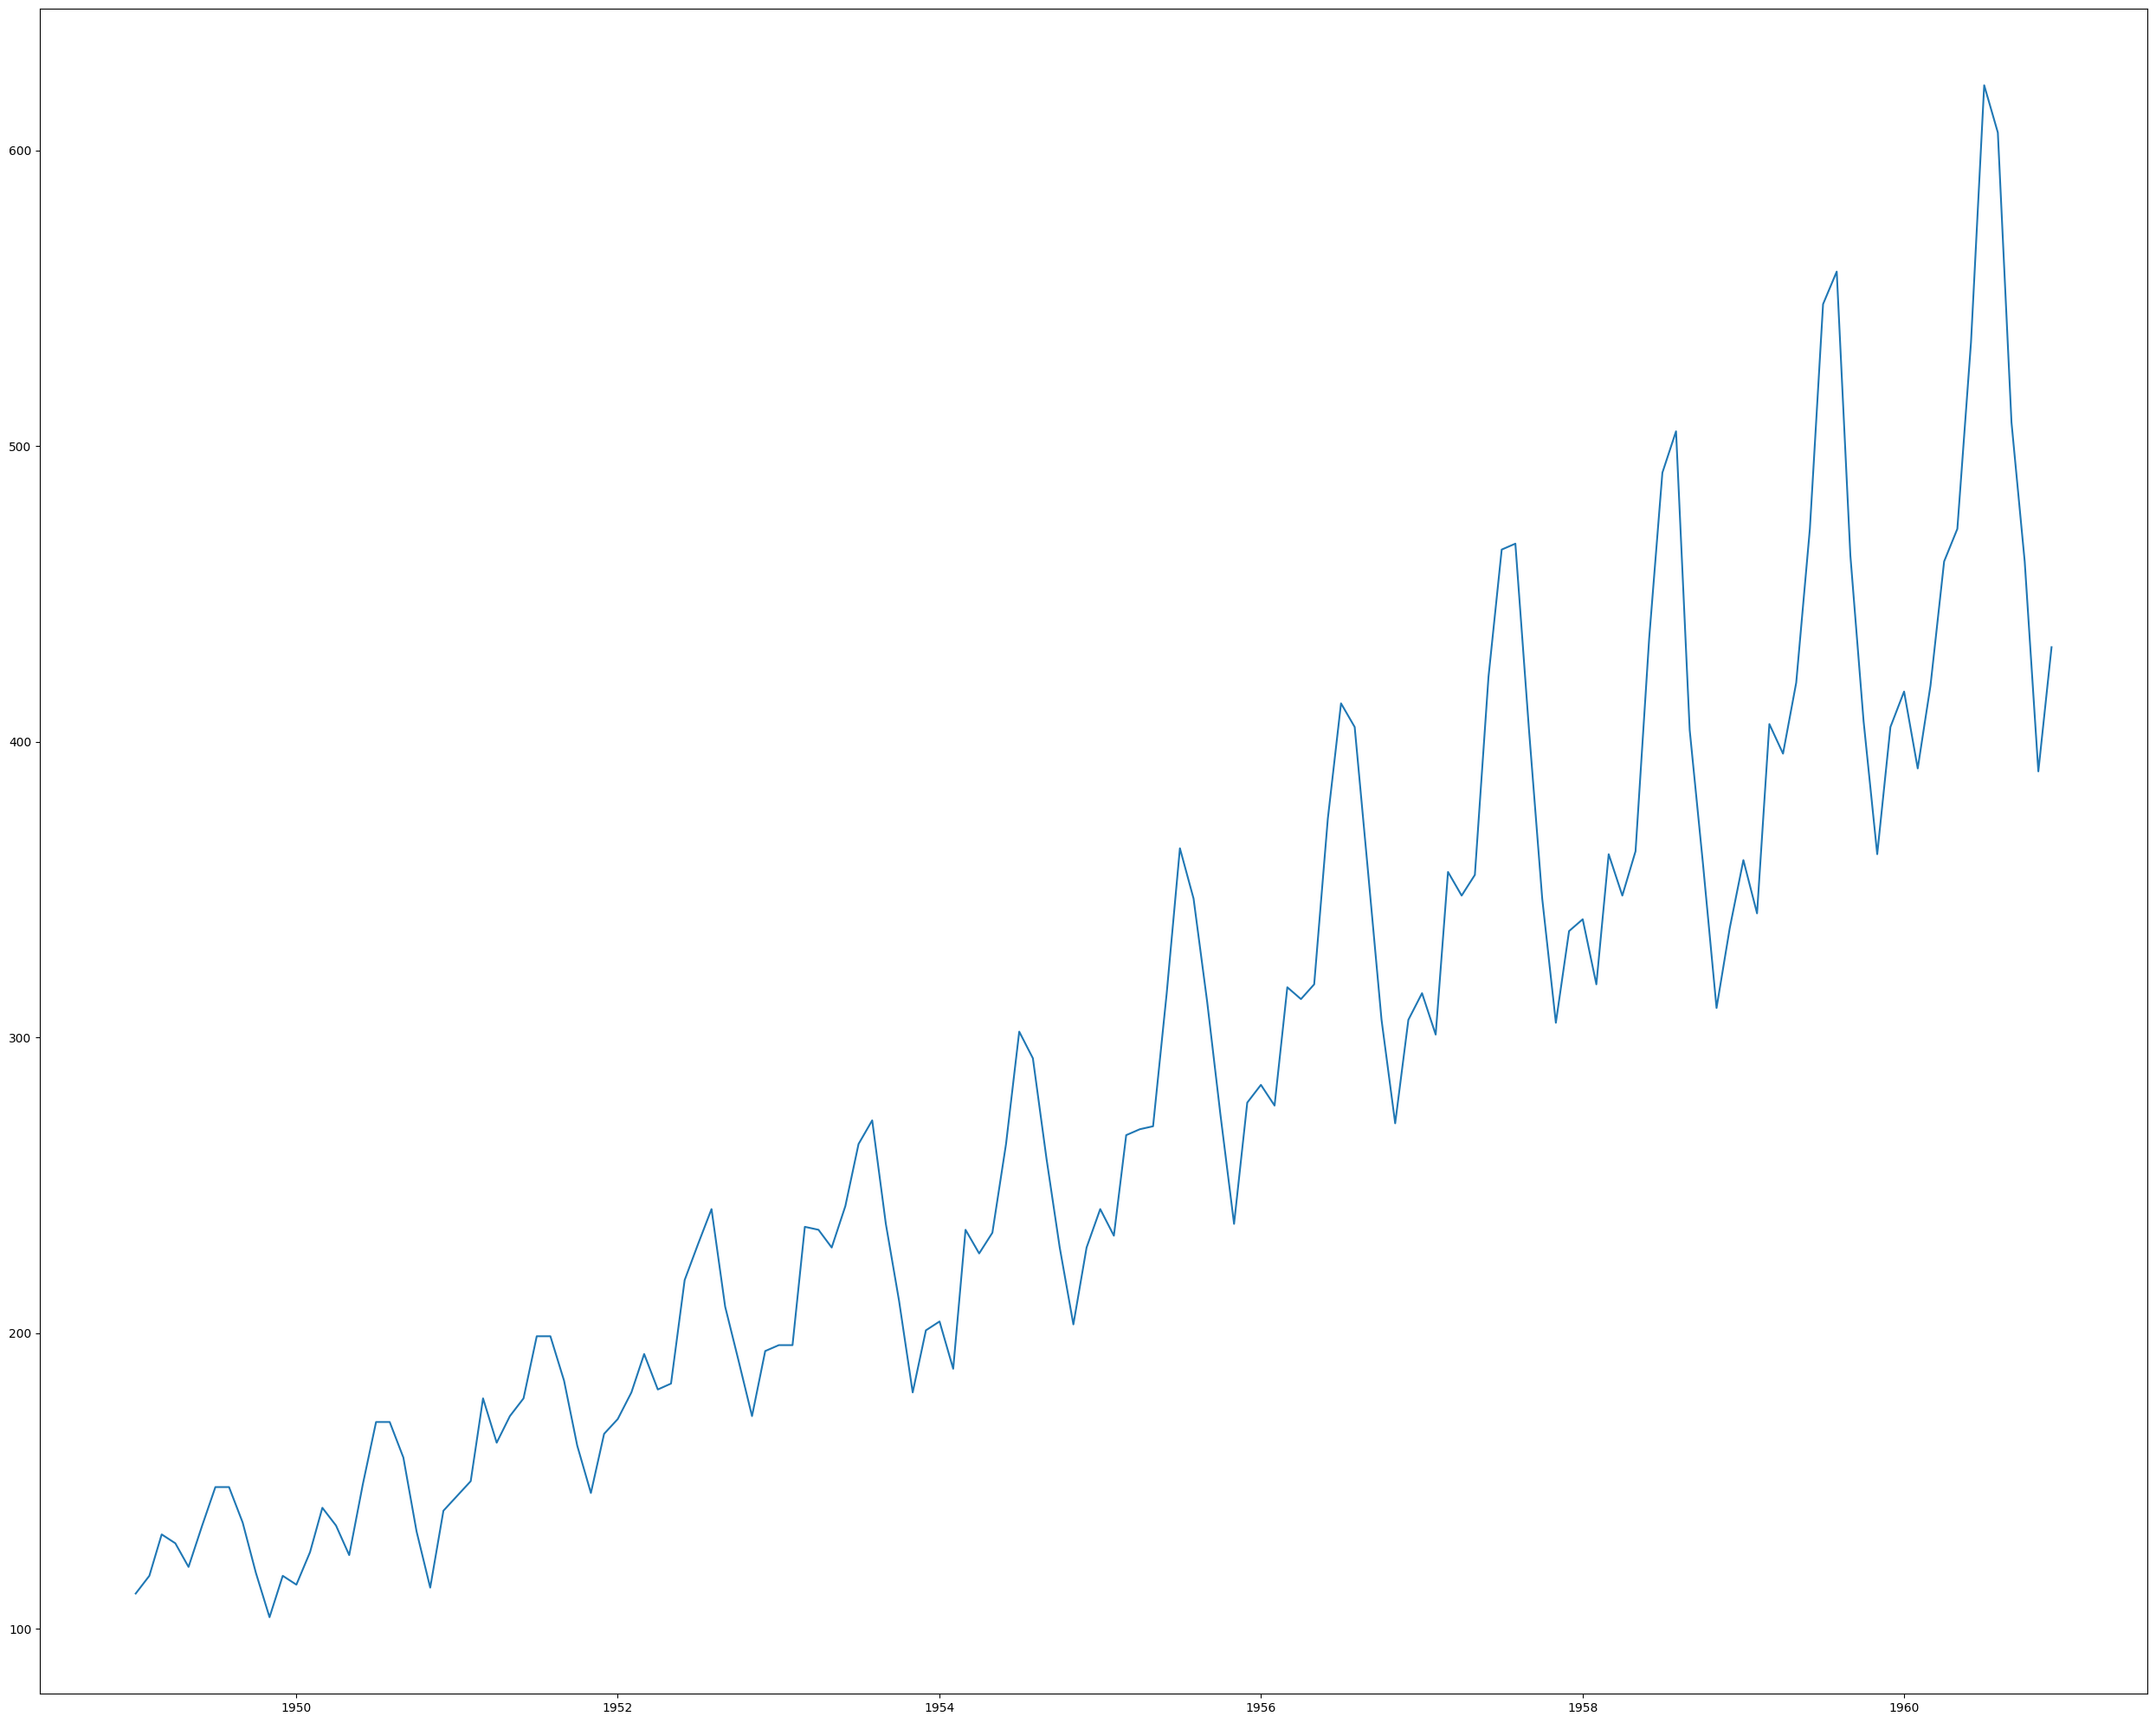

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20),facecolor='white')#canvas  size
plt.plot(data)
plt.tight_layout()
## from plot we can see the series given is not stationary

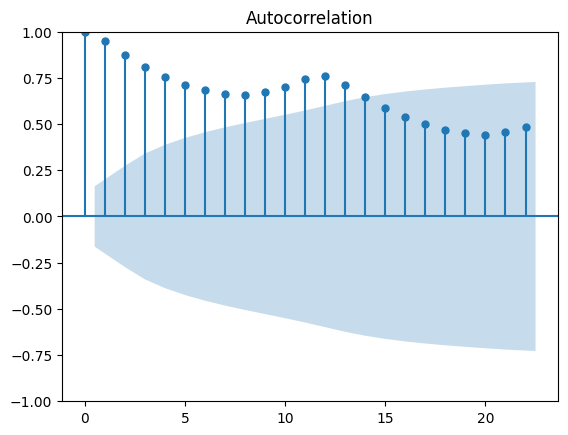

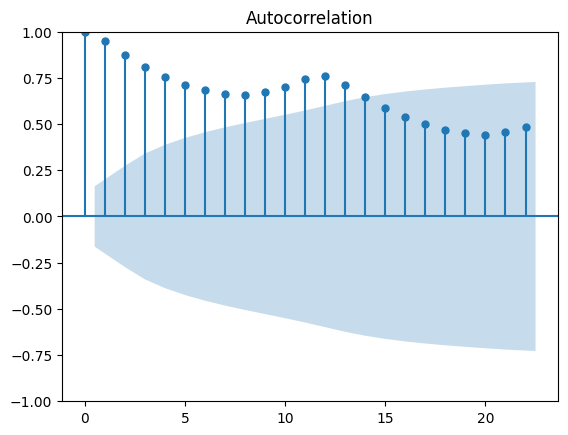

In [ ]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [ ]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
## making it stationary by taking difference of 1
data1 = data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply,
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [ ]:
data1 = data1.iloc[1:] #null value discarded
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


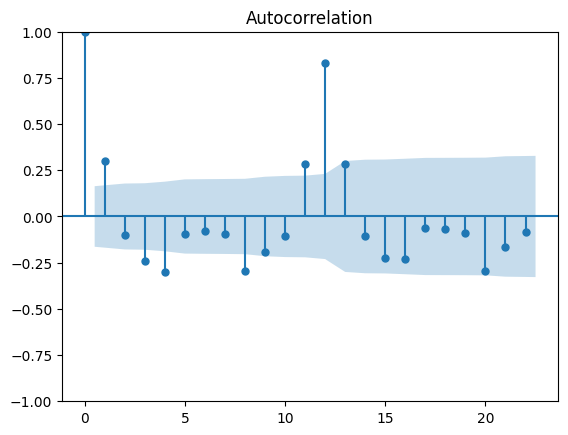

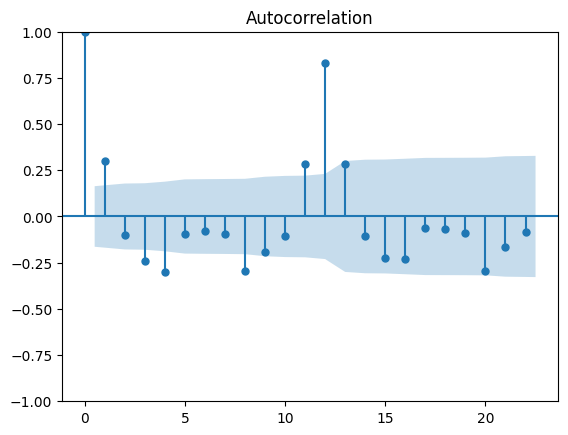

In [ ]:
plot_acf(data1)

In [ ]:
data2 = data1.diff(periods=1)

In [ ]:
data2.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [ ]:
data2 = data2.iloc[1:]
data2.head()

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


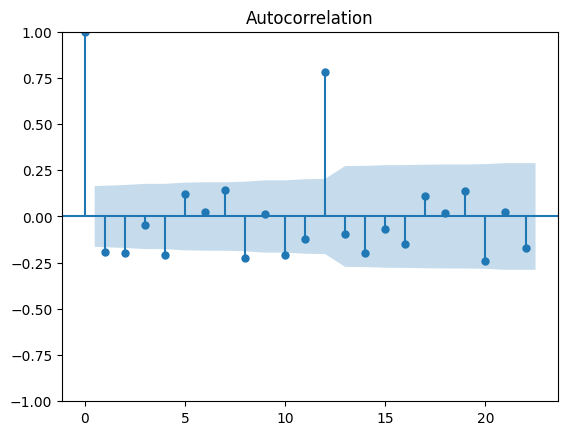

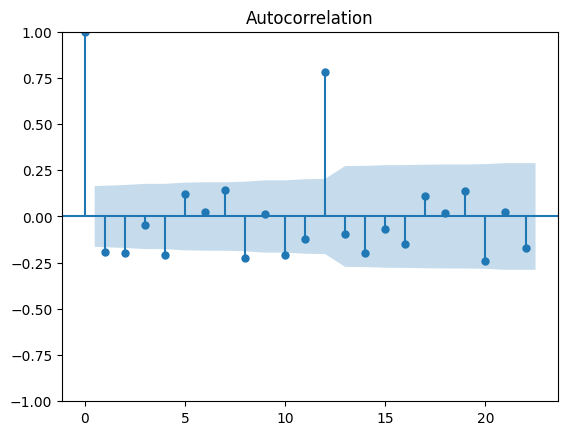

In [ ]:
plot_acf(data2)

In [ ]:
data2.shape

(142, 1)

In [ ]:
## Creating training and test sets
train = data2[:100]
test = data2[100:]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mar = ar_select_order(data1,maxlag=15, glob=True)
mar.ar_lags

[1, 8, 12, 13]

In [ ]:
## model creation
ar_model = AutoReg(train,lags=[1,8,12,13]) ## object creation with lags specified
ar_model_fit = ar_model.fit()  #training the model

In [ ]:
##making prediction
prediction = ar_model_fit.predict(start=100,end=142)


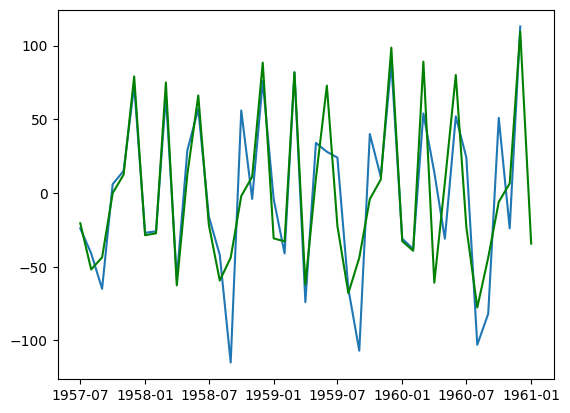

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(prediction,color='green')

# ARIMA Model

In [ ]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
##Model object creation and fitting the model
Model_arima = ARIMA(train,order=(1,1,0))
model_arima_fittu = Model_arima.fit()

In [ ]:
## evaluate the model
print(model_arima_fittu.aic)

1021.0396389673773


In [ ]:
## predicting the output of sample points
predictions = model_arima_fittu.forecast(steps=9)
predictions

,predicted_mean
1957-07-01,37.765356
1957-08-01,48.751565
1957-09-01,43.323244
1957-10-01,46.005395
1957-11-01,44.680135
1957-12-01,45.334950
1958-01-01,45.011404
1958-02-01,45.171269
1958-03-01,45.092279


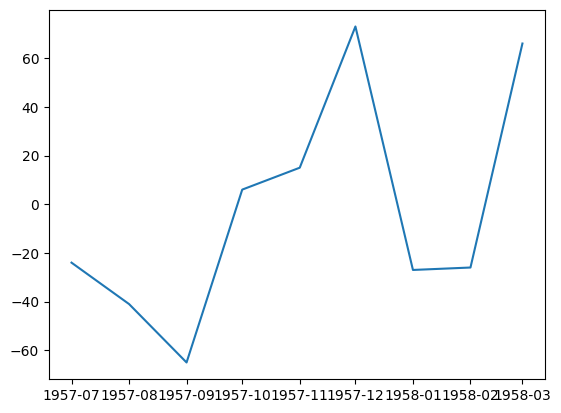

In [ ]:
plt.plot(test[:9])

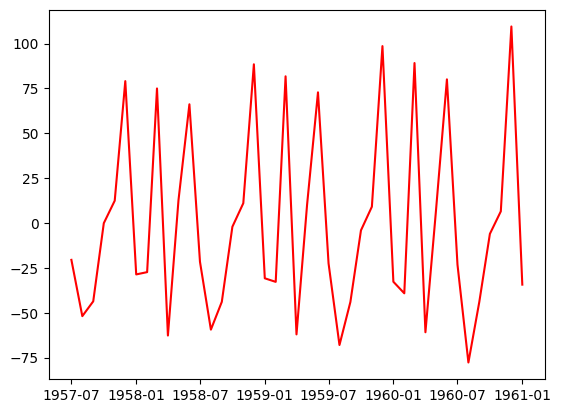

In [ ]:
## plotting the ARIMA forecast values using random pdq
plt.plot(prediction, color='red')

In [ ]:
## Geeting the optimal values of p,q and d
import itertools

p=d=q = range(0,4) #values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.

pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [ ]:
len(pdq)

64

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(pdq):
  model = ARIMA(train,order=i,enforce_stationarity=False,enforce_invertibility=False)
  model_fit = model.fit()
  pred = model_fit.predict(steps=42)

100%|██████████| 64/64 [00:14<00:00,  4.41it/s]


In [ ]:
model_fit.forecast(steps=4)

,predicted_mean
1957-07-01,-20.005366
1957-08-01,24.420371
1957-09-01,31.430951
1957-10-01,4.688918


In [ ]:
errors=[]
for i in tqdm(pdq):
  try:
    model = ARIMA(train,order=i)
    model_fit =model.fit()
    pred = model_fit.forecast(steps=42)
    error = np.mean(pred-(test.values.reshape(-1)))
    errors.append(error)
  except:
    print("exception for pdq values: ", i)

100%|██████████| 64/64 [00:16<00:00,  3.81it/s]


In [ ]:
np.argmin(errors)

np.int64(12)

In [ ]:
pdq[12]

(0, 3, 0)

In [ ]:
model_fit.aic

np.float64(992.1383380608579)

In [ ]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.

list1 = []
list2 = []

for params in tqdm(pdq):
  try:
    model_arima = ARIMA(train,order = params)
    model_arima_fit = model_arima.fit()
    print(params,model_arima_fit.aic)
    list1.append(params)
    list2.append(model_arima_fit.aic)
  except:
    continue

  3%|▎         | 2/64 [00:00<00:05, 11.84it/s]

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.4372807118069
(0, 0, 2) 925.7296657034741


  9%|▉         | 6/64 [00:01<00:10,  5.70it/s]

(0, 0, 3) 920.9009361677204
(0, 1, 0) 1046.731900142016
(0, 1, 1) 963.8739375096601


 11%|█         | 7/64 [00:01<00:10,  5.29it/s]

(0, 1, 2) 933.2130049082082


 12%|█▎        | 8/64 [00:02<00:20,  2.78it/s]

(0, 1, 3) 926.5735366854558
(0, 2, 0) 1143.9983209809495


 16%|█▌        | 10/64 [00:02<00:15,  3.56it/s]

(0, 2, 1) 1043.7570583591555


 17%|█▋        | 11/64 [00:02<00:15,  3.50it/s]

(0, 2, 2) 966.1633163353679


 19%|█▉        | 12/64 [00:03<00:22,  2.28it/s]

(0, 2, 3) 941.613810934949
(0, 3, 0) 1247.20709797673


 23%|██▎       | 15/64 [00:04<00:14,  3.41it/s]

(0, 3, 1) 1139.8659457768256
(0, 3, 2) 1044.647156590476


 25%|██▌       | 16/64 [00:04<00:15,  3.03it/s]

(0, 3, 3) 972.3660359308682
(1, 0, 0) 963.0127961450206


 28%|██▊       | 18/64 [00:04<00:11,  4.14it/s]

(1, 0, 1) 928.7077561479304


 30%|██▉       | 19/64 [00:05<00:10,  4.17it/s]

(1, 0, 2) 919.8685369472124


 34%|███▍      | 22/64 [00:05<00:07,  5.35it/s]

(1, 0, 3) 921.8388143407459
(1, 1, 0) 1021.0396389673773
(1, 1, 1) 959.4979666999722


 36%|███▌      | 23/64 [00:05<00:07,  5.55it/s]

(1, 1, 2) 962.9514176500866


 41%|████      | 26/64 [00:06<00:07,  4.86it/s]

(1, 1, 3) 923.2263383651344
(1, 2, 0) 1098.873846911669
(1, 2, 1) 1019.1218015530634


 42%|████▏     | 27/64 [00:06<00:09,  4.03it/s]

(1, 2, 2) 962.4933674871202


 47%|████▋     | 30/64 [00:07<00:06,  5.45it/s]

(1, 2, 3) 965.1462412743491
(1, 3, 0) 1186.5053670162727
(1, 3, 1) 1096.1395155138964


 48%|████▊     | 31/64 [00:07<00:05,  5.67it/s]

(1, 3, 2) 1021.3161905401086


 52%|█████▏    | 33/64 [00:07<00:05,  5.98it/s]

(1, 3, 3) 1048.4346745523617
(2, 0, 0) 951.2134496277041


 53%|█████▎    | 34/64 [00:08<00:04,  6.37it/s]

(2, 0, 1) 926.7745524278412


 55%|█████▍    | 35/64 [00:08<00:06,  4.67it/s]

(2, 0, 2) 921.8448905198377


 59%|█████▉    | 38/64 [00:08<00:04,  5.69it/s]

(2, 0, 3) 923.4339327753667
(2, 1, 0) 987.8554910217132
(2, 1, 1) 948.4595247250629


 61%|██████    | 39/64 [00:09<00:04,  5.45it/s]

(2, 1, 2) 948.207290886585


 66%|██████▌   | 42/64 [00:09<00:03,  6.36it/s]

(2, 1, 3) 924.3432835735488
(2, 2, 0) 1042.434133112728
(2, 2, 1) 987.1969170576727


 67%|██████▋   | 43/64 [00:10<00:04,  4.54it/s]

(2, 2, 2) 952.5019783373987


 72%|███████▏  | 46/64 [00:10<00:03,  5.23it/s]

(2, 2, 3) 955.5752981344166
(2, 3, 0) 1112.0638834741223
(2, 3, 1) 1041.3775809298809


 73%|███████▎  | 47/64 [00:11<00:04,  4.17it/s]

(2, 3, 2) 991.0092274172455


 77%|███████▋  | 49/64 [00:11<00:03,  4.07it/s]

(2, 3, 3) 960.9218383682382
(3, 0, 0) 953.1213128114455


 78%|███████▊  | 50/64 [00:11<00:03,  4.43it/s]

(3, 0, 1) 928.7783158607667


 80%|███████▉  | 51/64 [00:12<00:03,  4.15it/s]

(3, 0, 2) 923.5861503663629


 84%|████████▍ | 54/64 [00:12<00:02,  4.68it/s]

(3, 0, 3) 925.4068400376296
(3, 1, 0) 988.1270457402828
(3, 1, 1) 950.4173558489765


 86%|████████▌ | 55/64 [00:12<00:01,  4.62it/s]

(3, 1, 2) 947.4292748103051


 91%|█████████ | 58/64 [00:13<00:01,  5.01it/s]

(3, 1, 3) 925.6993667812268
(3, 2, 0) 1035.9653947028066
(3, 2, 1) 987.7213009078096


 92%|█████████▏| 59/64 [00:13<00:01,  4.72it/s]

(3, 2, 2) 988.3429755342235


 94%|█████████▍| 60/64 [00:14<00:01,  3.44it/s]

(3, 2, 3) 951.6950179042672
(3, 3, 0) 1092.0403291467835


 97%|█████████▋| 62/64 [00:14<00:00,  4.63it/s]

(3, 3, 1) 1035.4895473744825


 98%|█████████▊| 63/64 [00:15<00:00,  3.23it/s]

(3, 3, 2) 991.8375177540617


100%|██████████| 64/64 [00:17<00:00,  3.57it/s]

(3, 3, 3) 992.1383380608579


In [ ]:
min(list2)

np.float64(919.8685369472124)

In [ ]:
loc = list2.index(min(list2))
list1[loc]

(1, 0, 2)

In [ ]:
model_arima = ARIMA(train,order=(1,9,2))
model_arima_fit = model_arima.fit()

In [ ]:
print(model_arima_fit.aic)

1545.1462934274637


In [ ]:
forecast = model_arima_fit.forecast(steps=42)
len(forecast)

42

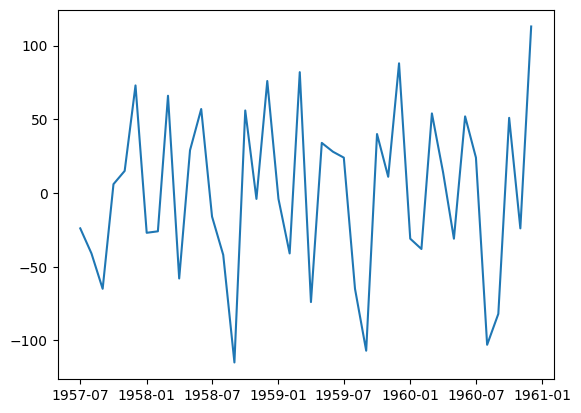

In [ ]:
plt.plot(test)

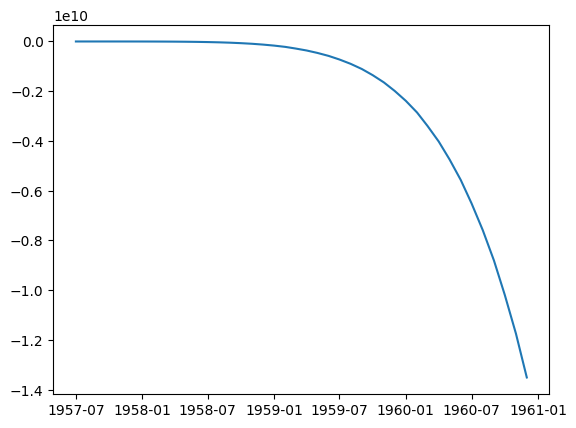

In [ ]:
plt.plot(forecast)

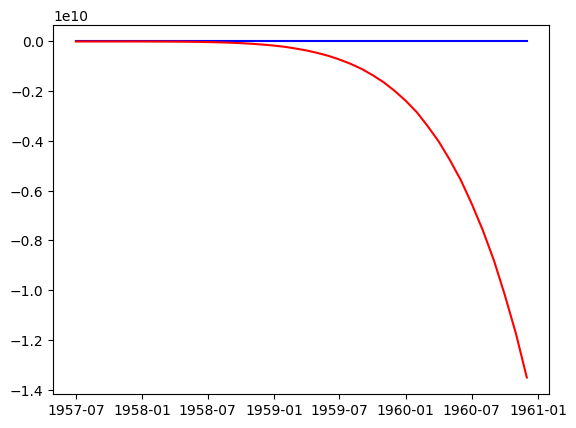

In [ ]:
plt.plot(test, color = 'blue')
plt.plot(forecast, color='red')

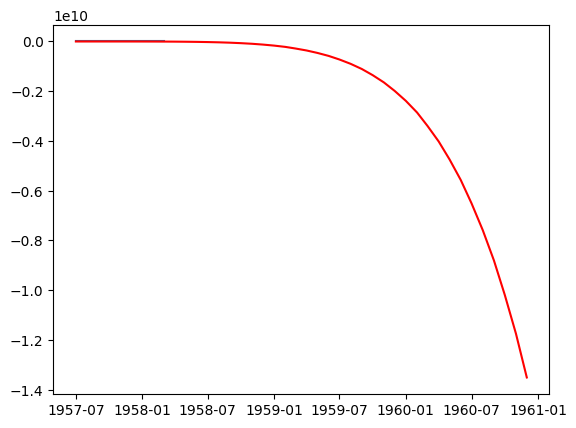

In [ ]:
plt.plot(test[:9])
plt.plot(forecast,color='red')

In [ ]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

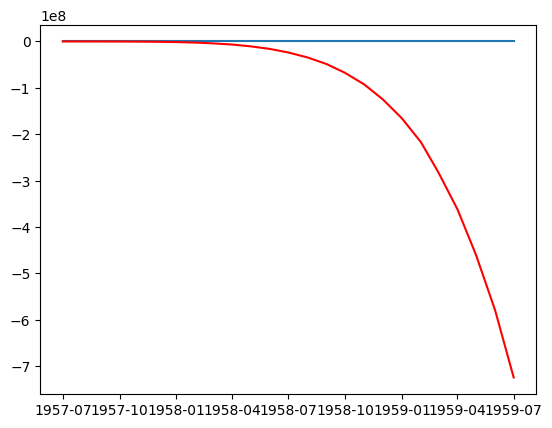

In [ ]:
plt.plot(test[:25])
plt.plot(forecast25,color='red')

In [ ]:
def forecast_accuracy(forecast,actual):
  mse = np.mean((forecast-actual)**2)
  mae = np.mean(np.abs(forecast-actual))
  rmse = np.mean((forecast-actual)**2)**0.5

  return({'mse':mse,'mae':mae,'rmse':rmse})

forecast_accuracy(forecast25,test1)


{'mse': np.float64(5.570333323079759e+16),
 'mae': np.float64(129058521.53400989),
 'rmse': np.float64(236015535.99455607)}

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

print(rmse(test1,forecast25))

mean_squared_error(test1,forecast25)

236015535.99455607


5.570333323079759e+16